## Q-learning

This notebook will guide you through implementation of vanilla Q-learning algorithm.

You need to implement QLearningAgent (follow instructions for each method) and use it on a number of tests below.

In [1]:
#XVFB will be launched if you run on a server
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1
        
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%writefile qlearning.py
from collections import defaultdict
import random, math
import numpy as np

class QLearningAgent:
    def __init__(self, alpha, epsilon, discount, get_legal_actions):
        """
        Q-Learning Agent
        based on http://inst.eecs.berkeley.edu/~cs188/sp09/pacman.html
        Instance variables you have access to
          - self.epsilon (exploration prob)
          - self.alpha (learning rate)
          - self.discount (discount rate aka gamma)

        Functions you should use
          - self.get_legal_actions(state) {state, hashable -> list of actions, each is hashable}
            which returns legal actions for a state
          - self.get_qvalue(state,action)
            which returns Q(state,action)
          - self.set_qvalue(state,action,value)
            which sets Q(state,action) := value

        !!!Important!!!
        Note: please avoid using self._qValues directly. 
            There's a special self.get_qvalue/set_qvalue for that.
        """

        self.get_legal_actions = get_legal_actions
        self._qvalues = defaultdict(lambda: defaultdict(lambda: 0))
        self.alpha = alpha
        self.epsilon = epsilon
        self.discount = discount

    def get_qvalue(self, state, action):
        """ Returns Q(state,action) """
        return self._qvalues[state][action]

    def set_qvalue(self,state,action,value):
        """ Sets the Qvalue for [state,action] to the given value """
        self._qvalues[state][action] = value

    #---------------------START OF YOUR CODE---------------------#

    def get_value(self, state):
        """
        Compute your agent's estimate of V(s) using current q-values
        V(s) = max_over_action Q(state,action) over possible actions.
        Note: please take into account that q-values can be negative.
        """
        possible_actions = self.get_legal_actions(state)

        #If there are no legal actions, return 0.0
        if len(possible_actions) == 0:
            return 0.0

             
        max_Q = -999
        for action in possible_actions:
            Q = self.get_qvalue(state, action)
            if Q > max_Q:
                max_Q = Q
            

        return max_Q

    def update(self, state, action, reward, next_state):
        """
        You should do your Q-Value update here:
           Q(s,a) := (1 - alpha) * Q(s,a) + alpha * (r + gamma * V(s'))
        """

        #agent parameters
        gamma = self.discount
        learning_rate = self.alpha

        value_next_state = self.get_value(next_state)
        current_Q = self.get_qvalue(state, action)
        
        next_Q = (1 - learning_rate) * current_Q + learning_rate * (reward + gamma * value_next_state)
        
                
        self.set_qvalue(state, action, next_Q)

    
    def get_best_action(self, state):
        """
        Compute the best action to take in a state (using current q-values). 
        """
        possible_actions = self.get_legal_actions(state)

        #If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None

        best_action = None
        max_Q = -99999
        
        for action in possible_actions:
            Q = self.get_qvalue(state, action)
            if Q > max_Q:
                max_Q = Q
                best_action = action
        
        return best_action

    def get_action(self, state):
        """
        Compute the action to take in the current state, including exploration.  
        With probability self.epsilon, we should take a random action.
            otherwise - the best policy action (self.getPolicy).
        
        Note: To pick randomly from a list, use random.choice(list). 
              To pick True or False with a given probablity, generate uniform number in [0, 1]
              and compare it with your probability
        """

        # Pick Action
        possible_actions = self.get_legal_actions(state)
        action = None

        #If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None

        #agent parameters:
        epsilon = self.epsilon

        rand = random.uniform(0,1)
        
        if rand < epsilon:
            action = random.choice(possible_actions)
        else:
            action = self.get_best_action(state)
        
        return action

Overwriting qlearning.py


### Try it on taxi

Here we use the qlearning agent on taxi env from openai gym.
You will need to insert a few agent functions here.

In [3]:
import gym
env = gym.make("Taxi-v2")

n_actions = env.action_space.n

[2018-08-09 12:07:45,263] Making new env: Taxi-v2
/usr/local/lib/python2.7/site-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ufuncs import *
/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/usr/local/lib/python2.7/site-packages/scipy/linalg/__init__.py:207: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/usr/local/lib/python2.7/site-packages/scipy/special/_ellip_harm.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ellip_harm_2 import _ellipsoid, _ellipsoid_norm
/usr/local/lib/python2.7/site-packages/scipy/interpolate/_bsplines.py:10: RuntimeWarning: numpy.dtype size changed, may indic

In [4]:
from qlearning import QLearningAgent

agent = QLearningAgent(alpha=0.5, epsilon=0.25, discount=0.99,
                       get_legal_actions = lambda s: range(n_actions))

In [5]:
def play_and_train(env,agent,t_max=10**4):
    """
    This function should 
    - run a full game, actions given by agent's e-greedy policy
    - train agent using agent.update(...) whenever it is possible
    - return total reward
    """
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        # get agent to pick action given state s.
        a = agent.get_action(s)
        
        next_s, r, done, _ = env.step(a)
        
        # train (update) agent for state s
        agent.update(s, a, r, next_s)  
        
        s = next_s
        total_reward +=r
        if done: break
        
    return total_reward
    
        
    

('eps =', 2.9191091959171894e-05, 'mean reward =', 96.4)


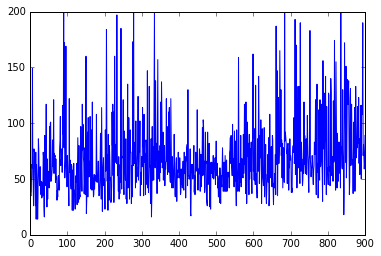

In [95]:
from IPython.display import clear_output

rewards_1 = []
for i in range(1000):
    rewards_1.append(play_and_train(env, agent))
    agent.epsilon *= 0.99
    
    if i %100 ==0:
        clear_output(True)
        print('eps =', agent.epsilon, 'mean reward =', np.mean(rewards_1[-10:]))
        plt.plot(rewards_1)
        plt.show()
        

### Submit to Coursera I

In [7]:
from submit import submit_qlearning1
submit_qlearning1(rewards, 'fg3@williams.edu', 'tHDrxGFLDKn62rz9')

You used an invalid email or your token may have expired. Please make sure you have entered all fields correctly. Try generating a new token if the issue still persists.


# Binarized state spaces

Use agent to train efficiently on CartPole-v0.
This environment has a continuous set of possible states, so you will have to group them into bins somehow.

The simplest way is to use `round(x,n_digits)` (or numpy round) to round real number to a given amount of digits.

The tricky part is to get the n_digits right for each state to train effectively.

Note that you don't need to convert state to integers, but to __tuples__ of any kind of values.

[2018-08-09 12:08:39,889] Making new env: CartPole-v0


first state:[ 0.01659828 -0.04713366 -0.02341563  0.03895135]


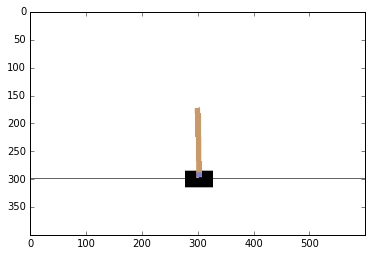

In [8]:
env = gym.make("CartPole-v0")
n_actions = env.action_space.n

print("first state:%s" % (env.reset()))
plt.imshow(env.render('rgb_array'))

### Play a few games

We need to estimate observation distributions. To do so, we'll play a few games and record all states.

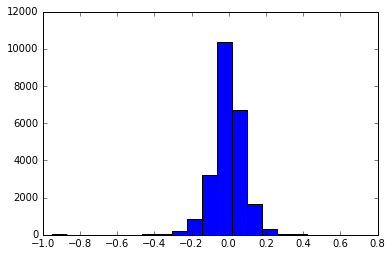

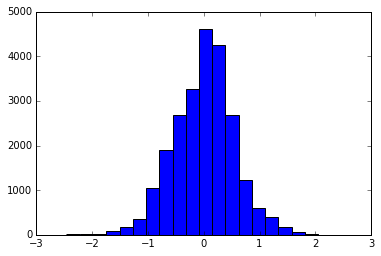

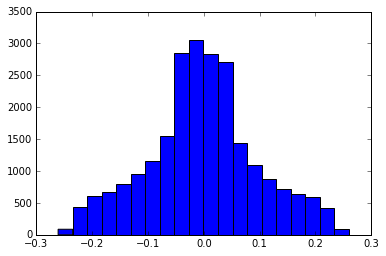

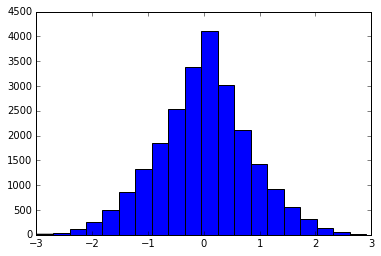

In [9]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        s, r, done, _ = env.step(env.action_space.sample())
        all_states.append(s)
        if done: break
            
all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):
    plt.hist(all_states[:, obs_i], bins=20)
    plt.show()

## Binarize environment

In [89]:
from gym.core import ObservationWrapper
class Binarizer(ObservationWrapper):
    
    def _observation(self, state):    
        
        #state = <round state to some amount digits.>
        #hint: you can do that with round(x,n_digits)
        
        state[0] = round(state[0], 1)
        state[1] = round(state[1], 1)
        state[2] = round(state[2], 1)
        state[3] = round(state[3], 1)
        
        
        #with np.nditer(state, op_flags=['readwrite']) as it:
        #   for x in it: 
        #      x[...] = round(x, 1)
            
        
        return tuple(state)

In [90]:
env = Binarizer(gym.make("CartPole-v0"))

[2018-08-09 12:39:01,355] Making new env: CartPole-v0


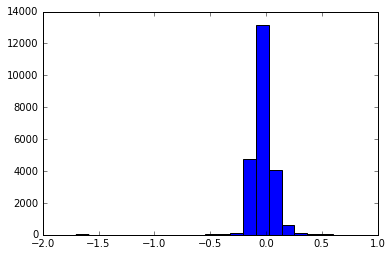

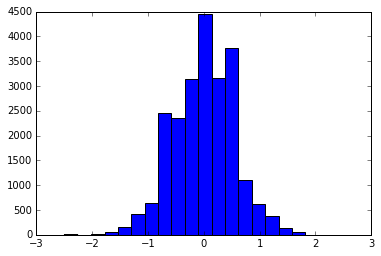

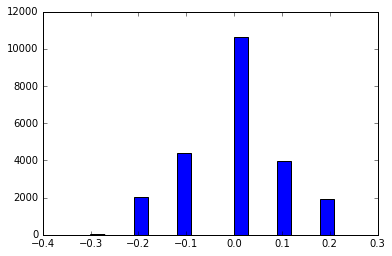

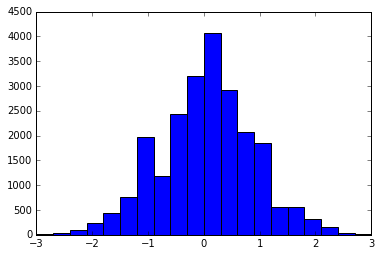

In [91]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        s, r, done, _ = env.step(env.action_space.sample())
        all_states.append(s)
        if done: break
            
all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):
    
    plt.hist(all_states[:,obs_i],bins=20)
    plt.show()

## Learn binarized policy

Now let's train a policy that uses binarized state space.

__Tips:__ 
* If your binarization is too coarse, your agent may fail to find optimal policy. In that case, change binarization. 
* If your binarization is too fine-grained, your agent will take much longer than 1000 steps to converge. You can either increase number of iterations and decrease epsilon decay or change binarization.
* Having 10^3 ~ 10^4 distinct states is recommended (`len(QLearningAgent._qvalues)`), but not required.


In [99]:
agent = QLearningAgent(alpha=0.5, epsilon=0.25, discount=0.99, get_legal_actions = lambda s: range(n_actions))

('eps =', 0.25, 'mean reward =', 90.1)


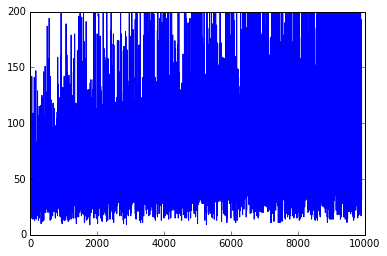

In [102]:
rewards_2 = []
for i in range(10000):
    rewards_2.append(play_and_train(env,agent))   
    
    #OPTIONAL YOUR CODE: adjust epsilon
    if i %100 ==0:
        clear_output(True)
        print('eps =', agent.epsilon, 'mean reward =', np.mean(rewards_2[-10:]))
        plt.plot(rewards_2)
        plt.show()
        

### Submit to Coursera II

In [103]:
import grading


def submit_qlearning1(rewards,rewards2, email, token):
    flag1 = np.mean(rewards[-10:])
    flag2 = np.mean(rewards2[-10:])
    grader = grading.Grader("XbjcGd7xEeeDzRKutDCmyA")
    grader.set_answer("5NB4z", flag1)
    grader.set_answer("CkyJ4", flag2)
    grader.submit(email, token)
    
submit_qlearning1(rewards_1,rewards_2, 'fg3@williams.edu', 'we9XqHFiJgEaAo2J')

Submitted to Coursera platform. See results on assignment page!
